# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, optimizers
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.duplicated().any()

True

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
data = df.iloc[:,:30]
targets = df.iloc[:,-1] 

In [9]:
data.shape

(283726, 30)

In [10]:
targets.shape

(283726,)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=.30,     random_state=1)

In [12]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test -= mean
x_test /= std

In [13]:
x_train= np.asarray(x_train).astype('float32')
x_test= np.asarray(x_test).astype('float32')

In [14]:
val_x=x_train[:100000]
partial_x_train=x_train[100000:]
val_y=y_train[:100000]
partial_y_train=y_train[100000:]

In [15]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(partial_x_train, partial_y_train,epochs=100, batch_size=10, verbose=1,validation_data=(val_x,val_y))

Train on 98608 samples, validate on 100000 samples
Epoch 1/100
98608/98608 [==============================] - 28s 287us/sample - loss: 0.0140 - acc: 0.9964 - val_loss: 0.0039 - val_acc: 0.9993
Epoch 2/100
98608/98608 [==============================] - 28s 288us/sample - loss: 0.0034 - acc: 0.9994 - val_loss: 0.0033 - val_acc: 0.9994
Epoch 3/100
98608/98608 [==============================] - 33s 339us/sample - loss: 0.0032 - acc: 0.9994 - val_loss: 0.0031 - val_acc: 0.9994
Epoch 4/100
98608/98608 [==============================] - 30s 303us/sample - loss: 0.0031 - acc: 0.9994 - val_loss: 0.0034 - val_acc: 0.9994
Epoch 5/100
98608/98608 [==============================] - 28s 287us/sample - loss: 0.0029 - acc: 0.9994 - val_loss: 0.0031 - val_acc: 0.9994
Epoch 6/100
98608/98608 [==============================] - 34s 341us/sample - loss: 0.0028 - acc: 0.9994 - val_loss: 0.0031 - val_acc: 0.9994
Epoch 7/100
98608/98608 [==============================] - 32s 323us/sample - loss: 0.0027 - acc:

98608/98608 [==============================] - 28s 289us/sample - loss: 0.0015 - acc: 0.9995 - val_loss: 0.0098 - val_acc: 0.9993
Epoch 58/100
98608/98608 [==============================] - 28s 280us/sample - loss: 0.0012 - acc: 0.9996 - val_loss: 0.0094 - val_acc: 0.9993
Epoch 59/100
98608/98608 [==============================] - 32s 320us/sample - loss: 0.0011 - acc: 0.9996 - val_loss: 0.0105 - val_acc: 0.9992
Epoch 60/100
98608/98608 [==============================] - 28s 289us/sample - loss: 0.0012 - acc: 0.9996 - val_loss: 0.0119 - val_acc: 0.9992
Epoch 61/100
98608/98608 [==============================] - 32s 321us/sample - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0102 - val_acc: 0.9993
Epoch 62/100
98608/98608 [==============================] - 31s 318us/sample - loss: 0.0014 - acc: 0.9995 - val_loss: 0.0104 - val_acc: 0.9992
Epoch 63/100
98608/98608 [==============================] - 33s 335us/sample - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0118 - val_acc: 0.9991
Epoch 64/100

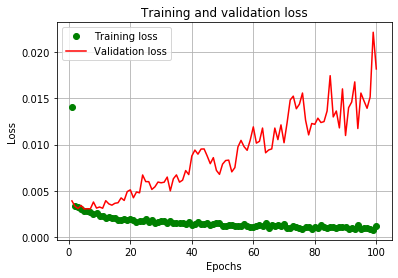

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,"go",label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [21]:
model.evaluate(x_test, y_test)

85118/85118 [==============================] - 2s 19us/sample - loss: 0.0163 - acc: 0.9992


[0.01632861705777827, 0.9991894]

In [22]:
pred = model.predict(x_test)
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)